# Prediction of survival in Titanic

# Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet

In [2]:
dataset = pd.read_csv('train.csv')
df = dataset.copy()

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for missing Values

In [5]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

### Filling the missing values

In [6]:
for column, data in df.items():
    if(df[column].isnull().sum() != 0):
        if(df[column].dtype != 'object'):
            df[column].fillna(df[column].median(), inplace= True)
        else:
            df[column].fillna(df[column].mode()[0], inplace = True)

### Dropping the Column having all unique values

In [7]:
for column, data in df.items():
    unique_number = df[column].nunique()
    print(f'{column} : {unique_number}')

PassengerId : 891
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3
Survived : 2


In [8]:
for column, data in df.items():
    if df[column].nunique() == df.shape[0]:
        df.drop(columns = column, inplace = True)

In [9]:
df.drop(columns = 'Ticket', inplace = True)

### Encoding Categorical Data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
for column, data in df.items():
    if df[column].dtype == 'object':
        labelencoder = LabelEncoder()
        df[column] = labelencoder.fit_transform(df[column])

## After Filling Missing Values & Encoding Categorical Data

In [13]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,22.0,1,0,7.2500,47,2,0
1,1,0,38.0,1,0,71.2833,81,0,1
2,3,0,26.0,0,0,7.9250,47,2,1
3,1,0,35.0,1,0,53.1000,55,2,1
4,3,1,35.0,0,0,8.0500,47,2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [15]:
df_correlation = df.corr()
df_correlation['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Cabin       0.175690
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

# Visualisation

<Axes: >

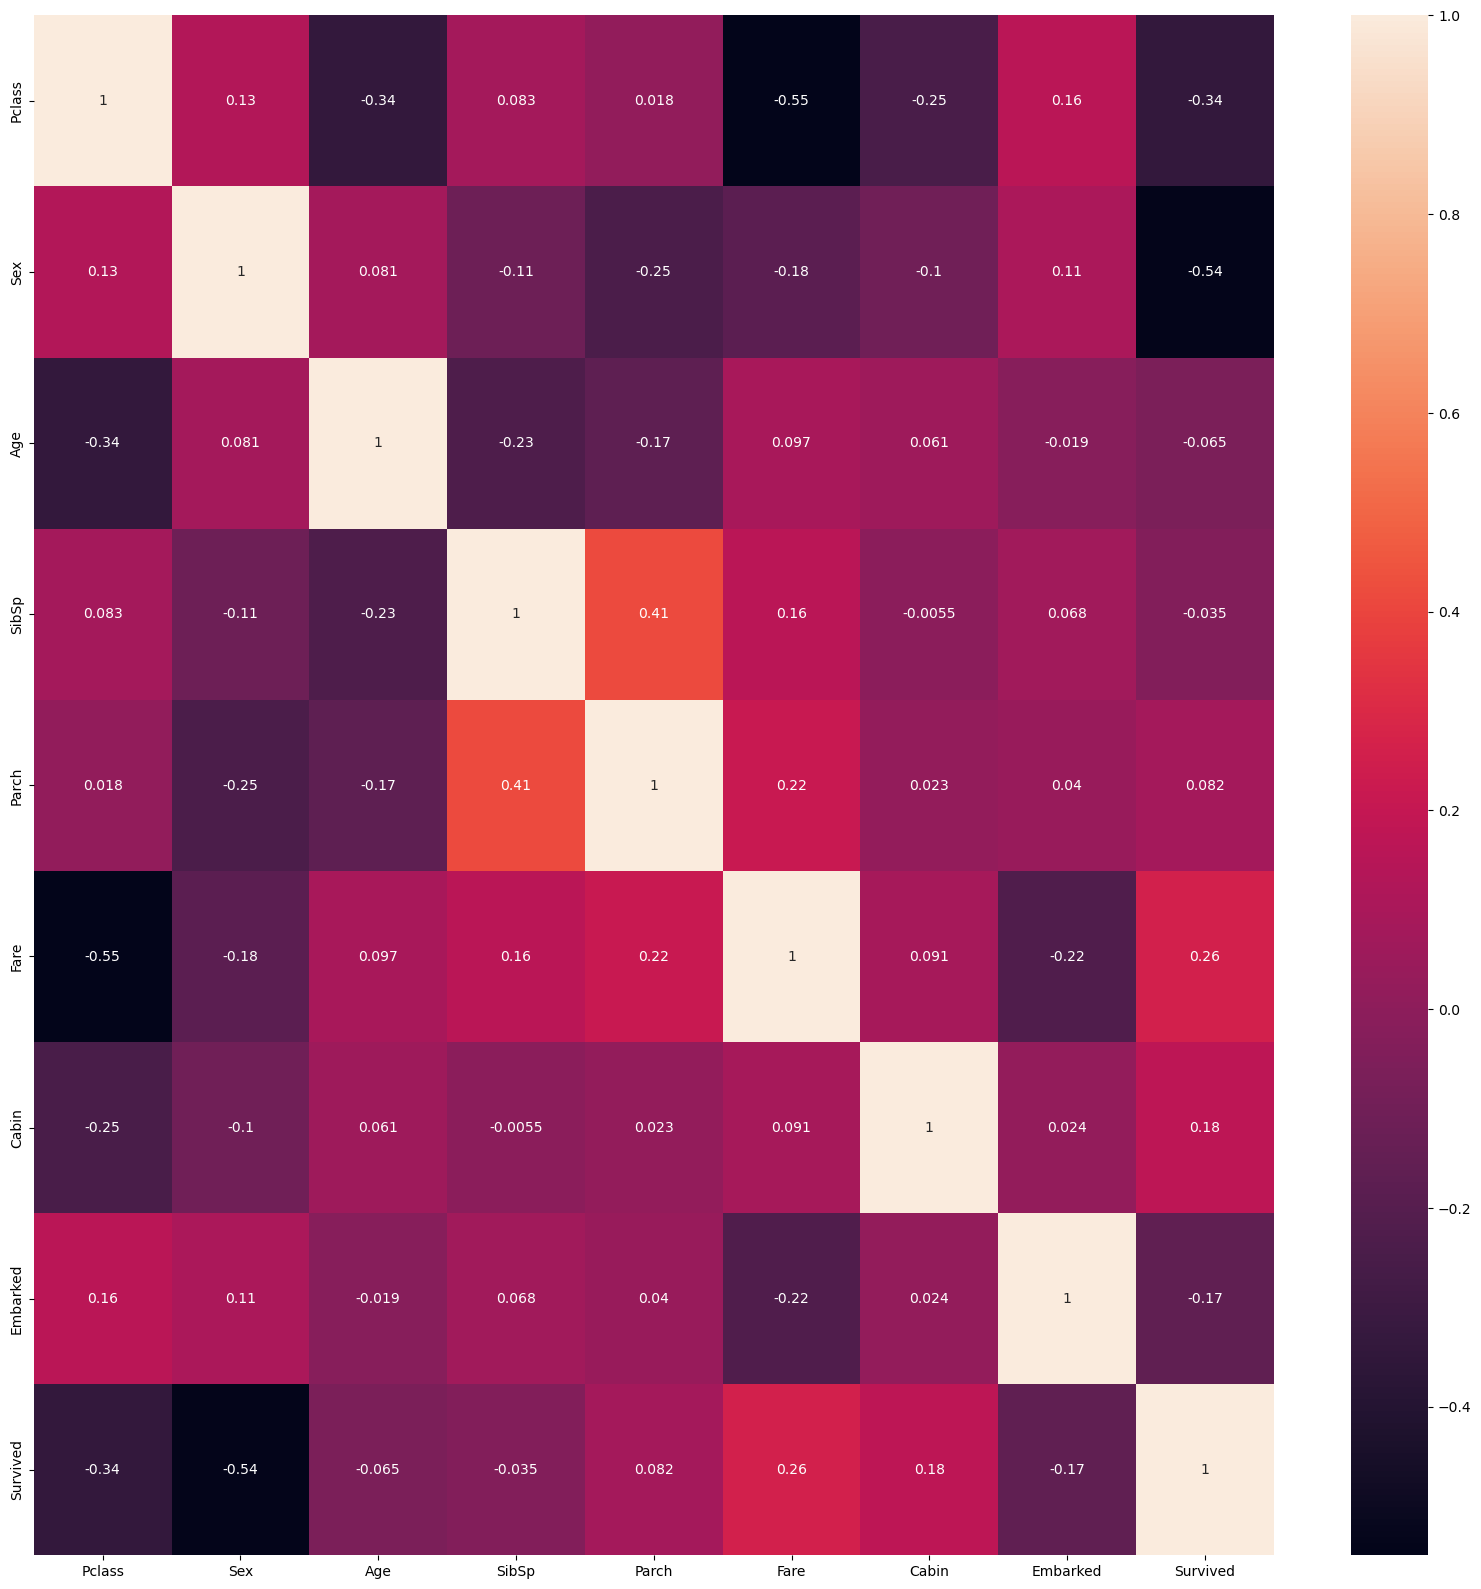

In [21]:
plt.figure(figsize = (20, 20), dpi = 100)
sns.heatmap(df_correlation, annot = True)

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

## Feature Scaling of independet variable

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fs = sc.fit_transform(X)